In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Data Analysis

In [4]:
# Remove the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(200, 4)

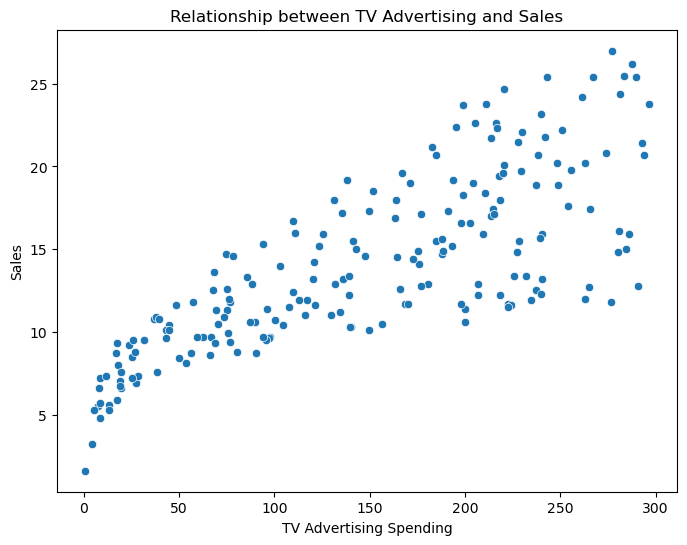

In [11]:
# Explore and visualize relationships
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Scatter plot between 'TV' advertising spending and 'Sales'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.title('Relationship between TV Advertising and Sales')
plt.show()

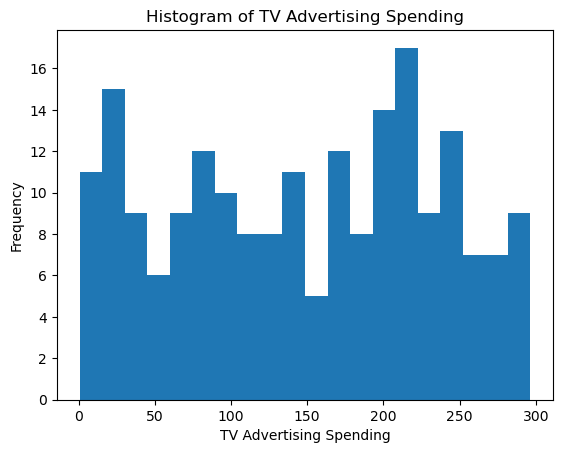

In [12]:
# Example: Histogram for 'TV' advertising spending
plt.hist(df['TV'], bins=20)
plt.xlabel('TV Advertising Spending')
plt.ylabel('Frequency')
plt.title('Histogram of TV Advertising Spending')
plt.show()

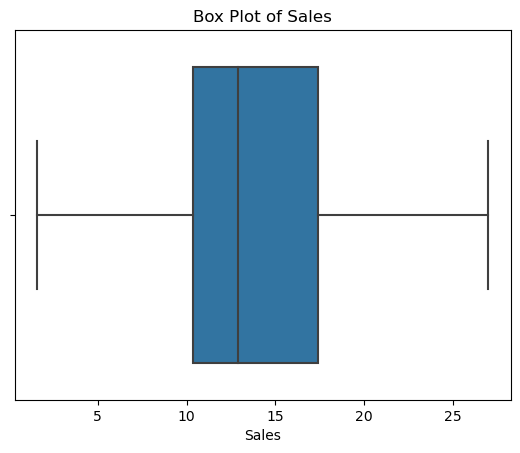

In [13]:
# Example: Box plot for 'Sales'
sns.boxplot(x=df['Sales'])
plt.xlabel('Sales')
plt.title('Box Plot of Sales')
plt.show()

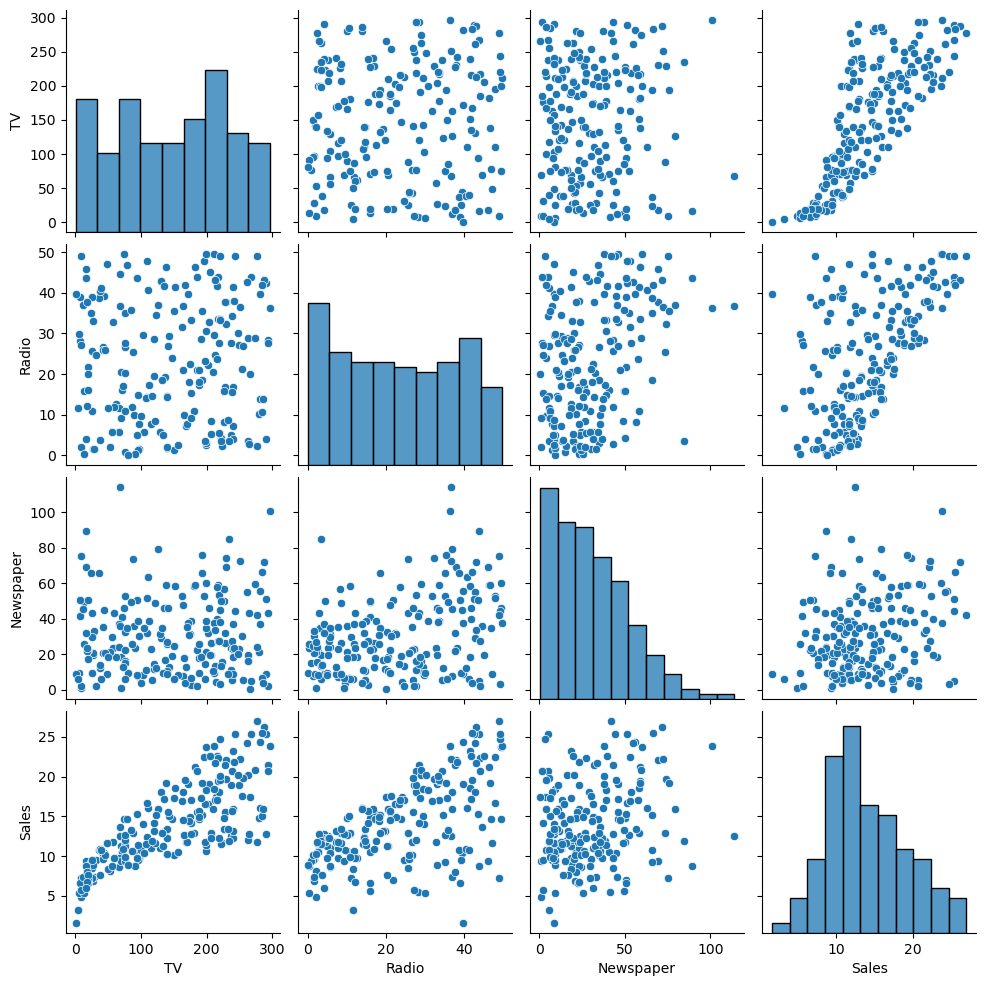

In [14]:
sns.pairplot(df)
plt.show()

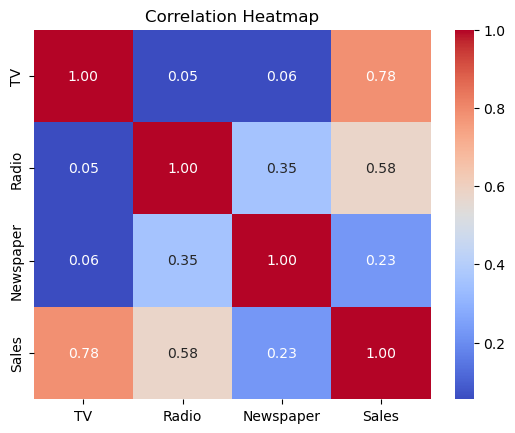

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering

In [16]:
# You can create new features here if needed.
# Example: Creating a feature 'Total_Advertising_Spending'
df['Total_Advertising_Spending'] = df['TV'] + df['Radio'] + df['Newspaper']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TV                          200 non-null    float64
 1   Radio                       200 non-null    float64
 2   Newspaper                   200 non-null    float64
 3   Sales                       200 non-null    float64
 4   Total_Advertising_Spending  200 non-null    float64
dtypes: float64(5)
memory usage: 9.4 KB


In [18]:
df.head()

,TV,Radio,Newspaper,Sales,Total_Advertising_Spending
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


## Modles Training

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Split the data into training and testing sets
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_linear.predict(X_test)

In [22]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.1169281005859366
R-squared: 0.9012492644128669


### Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_tree.predict(X_test)

In [24]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.5800000000000007
R-squared: 0.9499423287311826


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a random forest model
model_forest = RandomForestRegressor(random_state=42)
model_forest.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_forest.predict(X_test)

In [26]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.2455171750000056
R-squared: 0.9605394371482174


### Gradient Boosting Regressor

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train a gradient boosting model
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_gb.predict(X_test)

In [28]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.8866993355895187
R-squared: 0.9719075292055577


### SVM

In [29]:
from sklearn.svm import SVR

# Initialize and train an SVM regression model
model_svm = SVR(kernel='linear')  # You can choose different kernel functions like 'rbf' for non-linear relationships
model_svm.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_svm.predict(X_test)

In [30]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.6034868868924725
R-squared: 0.8858340746800268


## Prediction

In [31]:
import random

# Step 1: Take random 5 rows from the dataset with columns TV, Radio, Newspaper
random.seed(42)  # Setting a seed for reproducibility
sample_data = df[['TV', 'Radio', 'Newspaper']].sample(5)

In [32]:
sample_data

,TV,Radio,Newspaper
156,93.9,43.5,50.5
103,187.9,17.2,17.9
191,75.5,10.8,6.0
185,205.0,45.1,19.6
8,8.6,2.1,1.0


In [33]:
# Step 2: Add the 'Total_Advertising_Spending' column
sample_data['Total_Advertising_Spending'] = sample_data['TV'] + sample_data['Radio'] + sample_data['Newspaper']

In [34]:
sample_data

,TV,Radio,Newspaper,Total_Advertising_Spending
156,93.9,43.5,50.5,187.9
103,187.9,17.2,17.9,223.0
191,75.5,10.8,6.0,92.3
185,205.0,45.1,19.6,269.7
8,8.6,2.1,1.0,11.7


In [35]:
# Step 3: Make predictions using the five models
linear_predictions = model_linear.predict(sample_data)
tree_predictions = model_tree.predict(sample_data)
forest_predictions = model_forest.predict(sample_data)
gb_predictions = model_gb.predict(sample_data)
svm_predictions = model_svm.predict(sample_data)

In [36]:
# Step 4: Create a table with original value (Sales from sample data) and predictions
sample_data['Original Value'] = df.loc[sample_data.index, 'Sales']

predictions_table = pd.DataFrame({
    'Original Value': sample_data['Original Value'],
    'Linear Regression Prediction': linear_predictions,
    'Decision Tree Prediction': tree_predictions,
    'Random Forest Prediction': forest_predictions,
    'Gradient Boosting Prediction': gb_predictions,
    'SVM Prediction': svm_predictions
})

In [37]:
# Print the table
predictions_table

,Original Value,Linear Regression Prediction,Decision Tree Prediction,Random Forest Prediction,Gradient Boosting Prediction,SVM Prediction
156,15.3,15.506250,15.3,15.134,15.000967,16.175195
103,14.7,14.725000,14.7,14.900,14.784303,14.881355
191,9.9,8.365625,9.9,9.881,9.938718,8.820784
185,22.6,20.787500,22.6,21.674,22.651459,21.244575
8,4.8,3.642969,4.8,4.626,4.807608,4.223611


Upon evaluating these models and comparing their predictions to the original values,
we have come to the following conclusion:

    The Decision Tree model provided exact predictions for the given input data,
    suggesting strong predictive performance for this specific dataset.